## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

## Reading the data



### Variable Description

* Pclass Passenger Class :- Pclass (1 = 1st; 2 = 2nd; 3 = 3rd)
* survival :- Survival (0 = No; 1 = Yes)
* name :- Passenger Names
* sex :- Sex ["MALE","FEMALE"]
* age :- Age
* sibsp :- Number of Siblings/Spouses Aboard
* parch :- Number of Parents/Children Aboard
* ticket :- Ticket Number
* fare :- Passenger Fare (British pound)
* cabin :- Cabin
* embarked :- Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)



In [2]:
train_df = pd.read_csv('train.csv') # reading the train data
test_df = pd.read_csv('test.csv') # reading the test data

In [3]:
print('The training data has {} rows and {} columns'.format(train_df.shape[0], train_df.shape[1]))
print('The testing data has {} rows and {} columns'.format(test_df.shape[0], test_df.shape[1]))

The training data has 891 rows and 12 columns
The testing data has 418 rows and 11 columns


In [4]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [5]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [6]:
# descriptive statistics of train data

train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


For both the training and testing data we can see that for age column mean is around 30 and and std is around 14.

In [8]:
train_df.info() # checking the datatypes of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data cleaning and Visualization

In [9]:
# checking na values in train and test data

print('***** TRAIN DATA *****')
for col in train_df.columns:
    na_val = train_df[col].isna().sum()
    if na_val > 0:
        print('{} --> {}'.format(col, na_val))

print('*'*20)
    
print('***** TEST DATA *****')
for col in test_df.columns:
    na_val = test_df[col].isna().sum()
    if na_val > 0:
        print('{} --> {}'.format(col, na_val))

***** TRAIN DATA *****
Age --> 177
Cabin --> 687
Embarked --> 2
********************
***** TEST DATA *****
Age --> 86
Fare --> 1
Cabin --> 327


Since there are only 2 nan values for column Embarked in the train data we can replace them with the mode of the column

In [10]:
train_df['Embarked'].value_counts() # frequency of all the unique values

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [11]:
train_df['Embarked'].fillna('S', inplace = True) # filling the nan values with S

In [12]:
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True, font_scale = 0.7)

### Survived

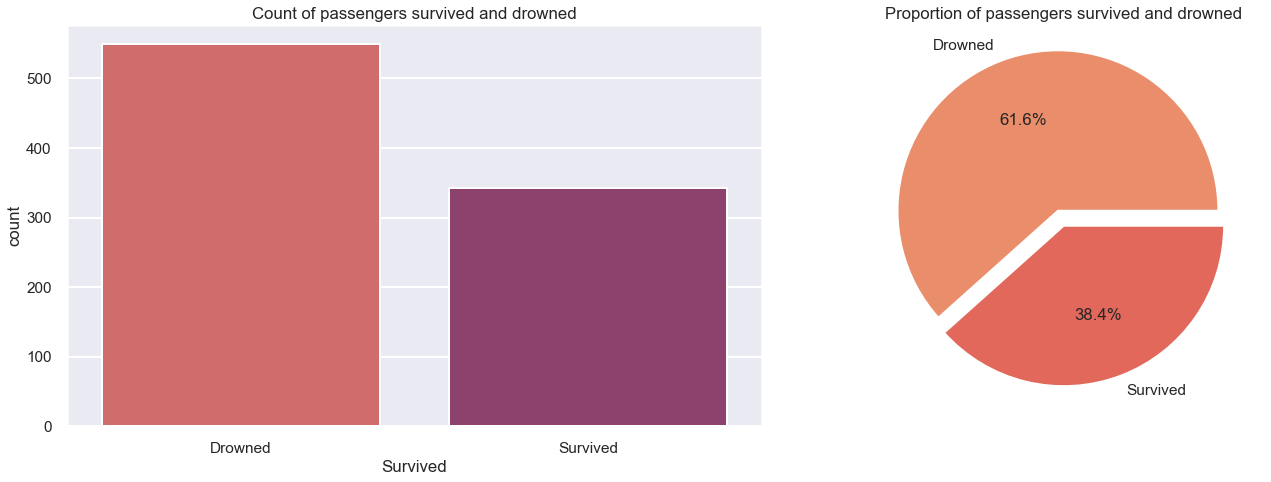

In [13]:
plt.figure(figsize = (20, 7)) # figure size

plt.subplot(121)
sns.countplot(train_df['Survived'], palette = 'flare') # countplot
plt.xticks( np.arange(2), ['Drowned', 'Survived'])
plt.title('Count of passengers survived and drowned') # title

plt.subplot(122)
# pie plot
plt.pie(train_df['Survived'].value_counts(), labels = ['Drowned', 'Survived'], autopct = '%1.1f%%', 
       explode = [0.1,0], colors = sns.color_palette('flare')[:2])
plt.title('Proportion of passengers survived and drowned') # title

plt.tight_layout()

__Observations:__

* Here we can see that 61.6 % of the passengers drowned and only 38.4 % of the passengers survived.

### Age

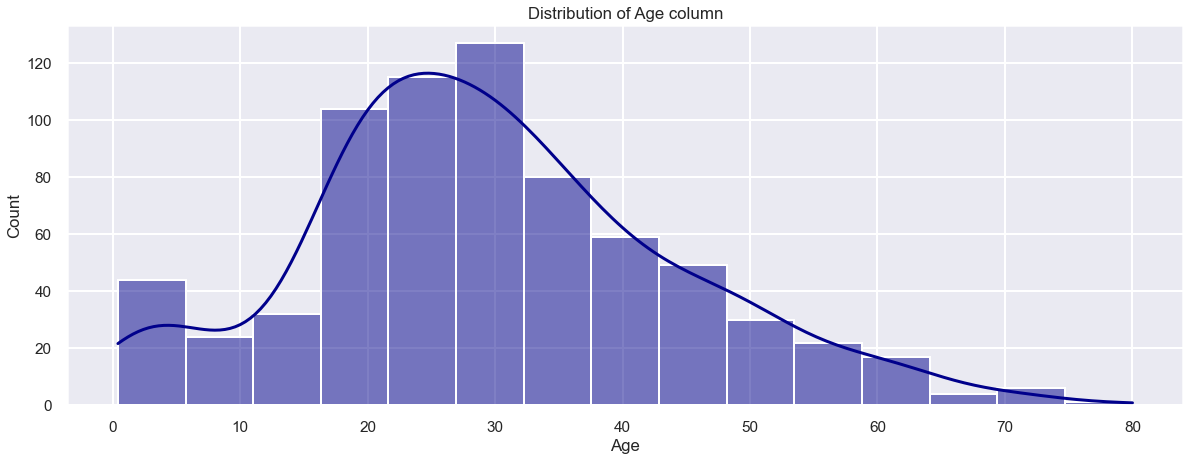

In [14]:
plt.figure(figsize = (20, 7))

sns.histplot(train_df['Age'], kde = True, color = 'darkblue', bins = 15)
plt.title('Distribution of Age column')
plt.show()

__Observations:__

* Here we can see that passengers less than age of 40 traveled more compared to passengers of age greater than 40.
* Also in age less than 40 there are more passengers between the age 15 to 35.

#### Age Vs Survived

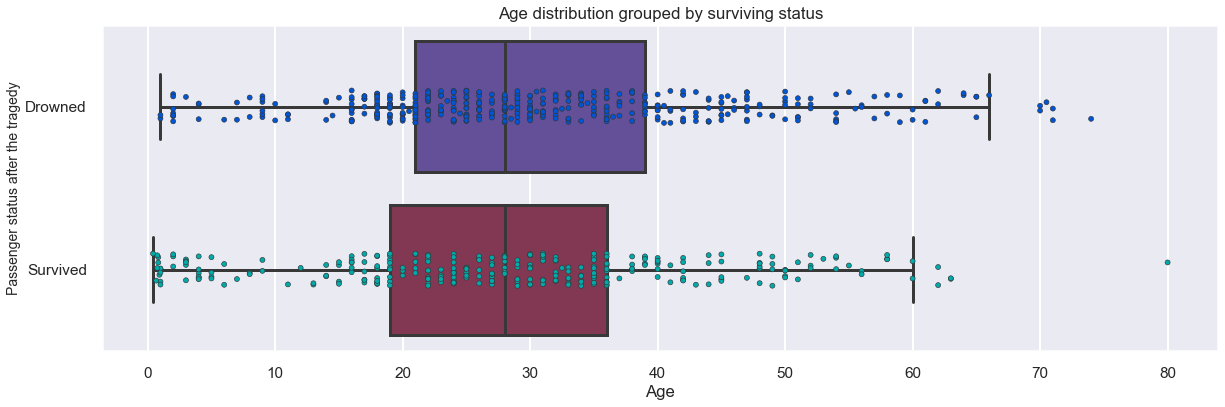

In [15]:
plt.figure(figsize=(20, 6))

# box plot
sns.boxplot(y = 'Survived', x = 'Age', data = train_df,
      fliersize = 0, palette= 'twilight', orient = 'h')

# strip plot
sns.stripplot(y = 'Survived', x = 'Age', data = train_df,
     linewidth = 0.6, palette='winter', orient = 'h')

plt.yticks( np.arange(2), ['Drowned', 'Survived'])
plt.title('Age distribution grouped by surviving status')
plt.ylabel('Passenger status after the tragedy', fontsize = 14)

plt.show()

In [16]:
train_df.groupby('Survived')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,424.0,30.626179,14.172110,1.00,21.0,28.0,39.0,74.0
1,290.0,28.343690,14.950952,0.42,19.0,28.0,36.0,80.0


__Observations:__

* The minimum age of drowned passenger is 1 who is a baby.
* The maximum age of the drowned passenger is 74 who is a elder.
* Passengers above the age of 60 drowned more compared to their survival count.

#### Age Vs Class

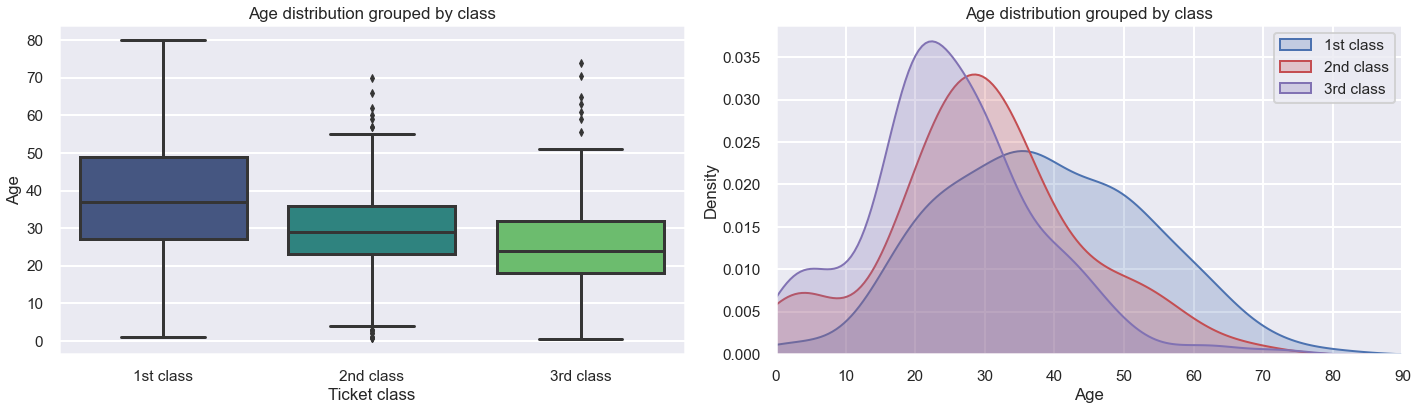

In [17]:
# set size
plt.figure(figsize=(20, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x = 'Pclass', y = 'Age', data = train_df, palette = 'viridis')
plt.xticks( np.arange(3), ['1st class', '2nd class', '3rd class'])
plt.title('Age distribution grouped by class')
plt.xlabel('Ticket class')


plt.subplot(1,2,2)

class_1_age = train_df[(train_df['Age']>0) & (train_df['Pclass'] == 1)]
class_2_age = train_df[(train_df['Age']>0) & (train_df['Pclass'] == 2)]
class_3_age = train_df[(train_df['Age']>0) & (train_df['Pclass'] == 3)]

# Ploting the 3 variables that we create
sns.kdeplot(class_1_age["Age"], shade =True, color = 'b', label = '1st class')
sns.kdeplot(class_2_age["Age"], shade = True, color = 'r', label = '2nd class')
sns.kdeplot(class_3_age["Age"], shade = True, color = 'm', label = '3rd class')
plt.title('Age distribution grouped by class')
plt.xlabel('Age')
plt.xlim(0, 90)
plt.legend(loc='upper right')

plt.tight_layout()

__Observations:__

* Here we can see that there is difference in the distribution of age for each class of travel..
* We can use this to fill na values in age column

In [18]:
train_df.groupby('Pclass')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [19]:
def compute_age(cols):
    age = cols[0] # age value
    pclass = cols[1] # pclass value
    
    if pd.isna(age): # checking if nan value
        if pclass == 1:
            return 38 # replacement age value for pclass 1
        elif pclass == 2:
            return 28 # replacement age value for pclass 1
        else:
            return 25 # replacement age value for pclass 1
    else:
        return age # original value

In [20]:
train_df["Age"] = train_df[["Age","Pclass"]].apply(compute_age,axis=1) # applying the function on age column
test_df["Age"] = test_df[["Age","Pclass"]].apply(compute_age,axis=1) # applying the function on age column

#### Age Vs Gender Vs Class

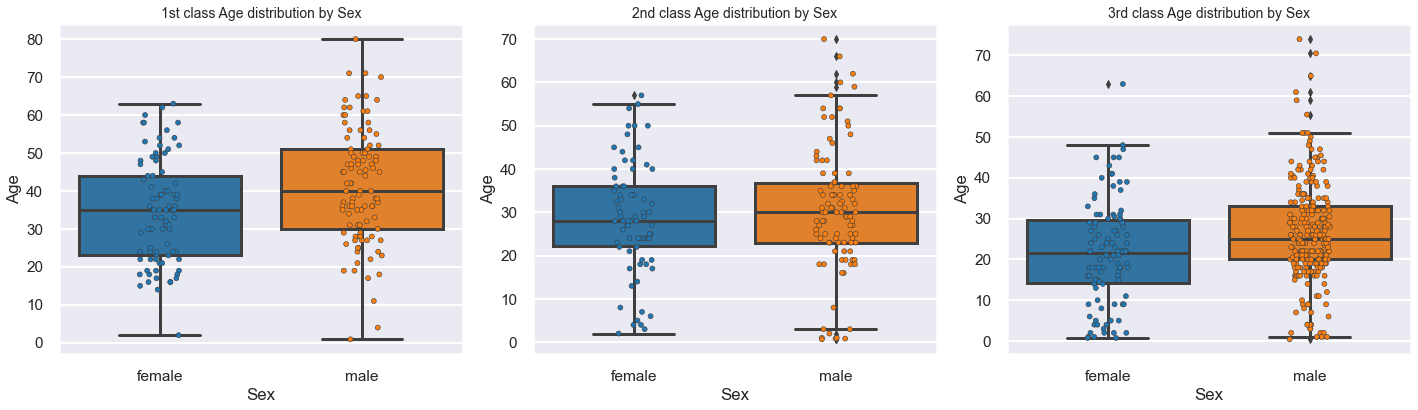

In [21]:
plt.figure(figsize=(20, 6)) # setting the figure size

plt.subplot(1, 3, 1)
sns.boxplot(x = 'Sex', y = 'Age', data = class_1_age, palette = 'tab10') # boxplot
sns.stripplot(x = 'Sex', y = 'Age', data = class_1_age, linewidth = 0.6, palette = 'tab10') # strip plot
plt.title('1st class Age distribution by Sex', fontsize= 14) # title

plt.subplot(1, 3, 2)
sns.boxplot(x = 'Sex', y = 'Age', data = class_2_age, palette = 'tab10')
sns.stripplot(x = 'Sex', y = 'Age', data = class_2_age, linewidth = 0.6, palette = 'tab10') # strip plot
plt.title('2nd class Age distribution by Sex', fontsize= 14) # title

plt.subplot(1, 3, 3)
sns.boxplot(x = 'Sex', y = 'Age',  data = class_3_age, order = ['female', 'male'], palette = 'tab10') # boxplot
sns.stripplot(x = 'Sex', y = 'Age', data = class_3_age, order = ['female', 'male'], linewidth = 0.6, palette = 'tab10')
plt.title('3rd class Age distribution by Sex', fontsize= 14) # title

plt.tight_layout()

In [22]:
# Descriptive Statictics
class_1_age_stat = pd.DataFrame(class_1_age.groupby('Sex')['Age'].describe())
class_2_age_stat = pd.DataFrame(class_2_age.groupby('Sex')['Age'].describe())
class_3_age_stat = pd.DataFrame(class_3_age.groupby('Sex')['Age'].describe())


pd.concat([class_1_age_stat, class_2_age_stat, class_3_age_stat], 
          axis=0, sort = False, keys = ['1st', '2nd', '3rd'])

count       mean        std   min     25%   50%    75%   max
    Sex                                                                 
1st female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
    male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
2nd female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
    male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
3rd female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
    male    253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

__Observations:__

* Here we can see that average age of females for each class is less compared to average age of male.
* Also the number of passengers traveled in third class is more compared to other classes.

### Cabin

In [23]:
train_df['Cabin'].unique()[:5]

array([nan, 'C85', 'C123', 'E46', 'G6'], dtype=object)

We can extract only the character from cabin name and leave out the numbers.

In [24]:
train_df['Cabin'] = train_df['Cabin'].str.split('', expand = True)[1]
test_df['Cabin'] = test_df['Cabin'].str.split('', expand = True)[1]

In [25]:
train_df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Since there are nan values we can replace those values with a new category 'U' (Unknown).

In [26]:
# filling nan values in train and test of cabin col

train_df['Cabin'].fillna('U', inplace = True)
test_df['Cabin'].fillna('U', inplace = True)

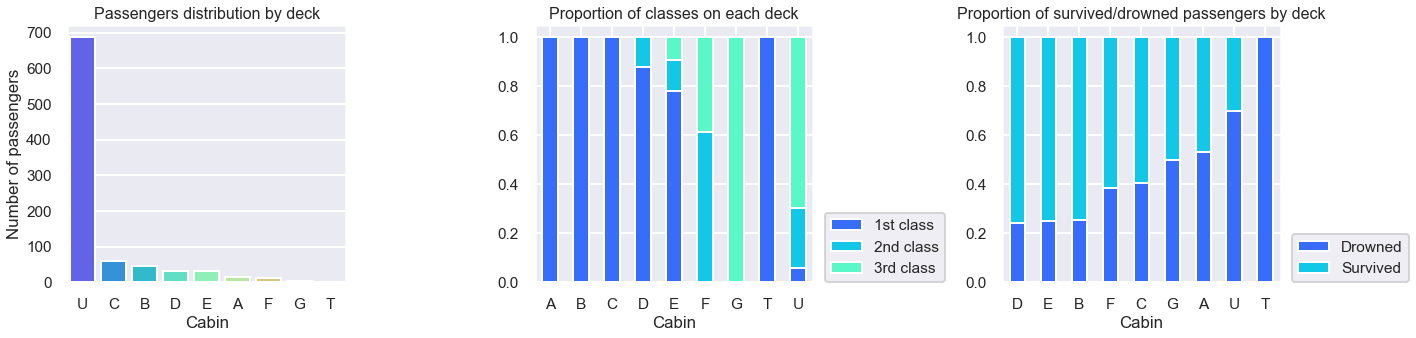

In [27]:
fig = plt.figure(figsize=(20, 5)) # setting the figure size

ax1 = fig.add_subplot(131)
# countplot
sns.countplot(x = 'Cabin', data = train_df, palette = 'rainbow', order = train_df['Cabin'].value_counts().index, ax = ax1)
plt.title('Passengers distribution by deck',fontsize= 16) # title
plt.ylabel('Number of passengers') # ylabel

ax2 = fig.add_subplot(132)
deck_by_class = train_df.groupby('Cabin')['Pclass'].value_counts(normalize = True).unstack()
deck_by_class.plot(kind = 'bar', stacked = 'True', color = sns.color_palette('rainbow')[:3], ax = ax2) # stacked bar plot
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0)) # setting the legend
plt.title('Proportion of classes on each deck',fontsize= 16) # title
plt.xticks(rotation = False)

ax3 = fig.add_subplot(133)
deck_by_survived = train_df.groupby('Cabin')['Survived'].value_counts(normalize = True).unstack()
deck_by_survived = deck_by_survived.sort_values(by = 1, ascending = False)
deck_by_survived.plot(kind = 'bar', stacked = 'True', color = sns.color_palette('rainbow')[:2], ax = ax3) # stacked bar plot
plt.title('Proportion of survived/drowned passengers by deck',fontsize= 16) # title
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0))
plt.xticks(rotation = False)
plt.tight_layout()

__Observations:__

* From the second graph we can see that Cabin A,B,C,T were completely occupied by 1st class and majority of the D and E were also occupied by 1st class.
* Cabin G was completely occupied by 3rd class.
* Majority of U deck were also 3rd class.
* All the passengers from Cabin T (1st class) drowned.


### Sibiling/Spouse and Parent/children

We can combine the total of SibSp and Parch to get the total number of people traveled in a single family.

In [28]:
# we add 1 here to consider the passenger themself.

train_df['Family_size'] = train_df['SibSp'] + train_df['Parch'] + 1
test_df['Family_size'] = test_df['SibSp'] + train_df['Parch'] + 1

#### Family Size Vs Survival

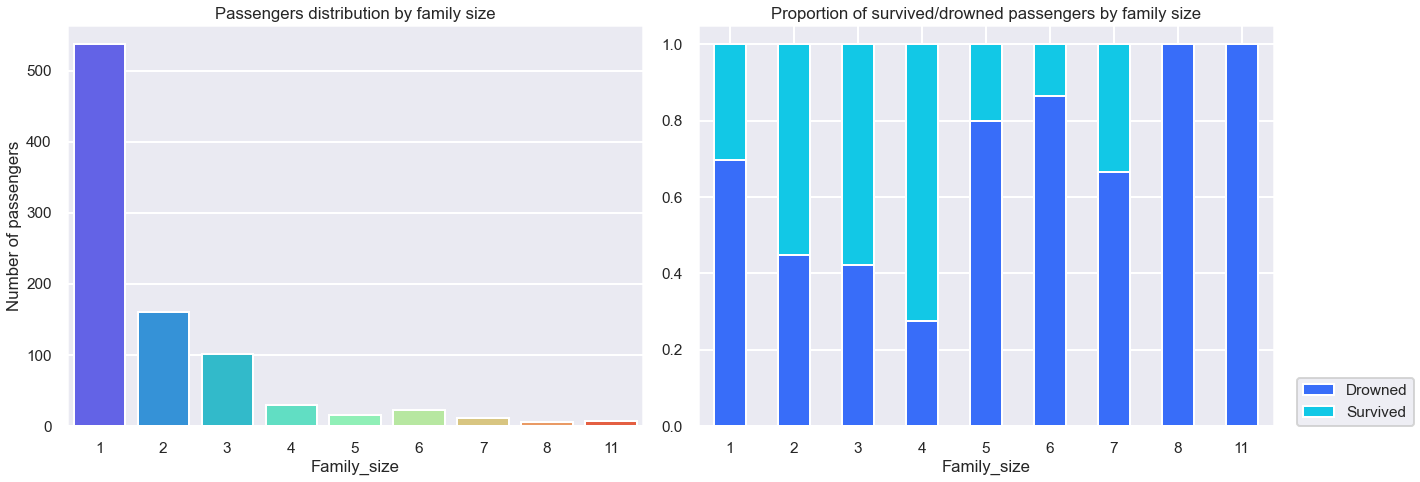

In [29]:
fig = plt.figure(figsize = (20,7)) # figure size

ax1 = fig.add_subplot(121)
ax = sns.countplot(train_df['Family_size'], ax = ax1, palette = 'rainbow') # countplot
plt.title('Passengers distribution by family size') # title
plt.ylabel('Number of passengers') # ylabel

ax2 = fig.add_subplot(122)
d = train_df.groupby('Family_size')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind = 'bar', color = sns.color_palette('rainbow')[:2], stacked = 'True', ax = ax2) # stacked bar plot
plt.title('Proportion of survived/drowned passengers by family size') # title
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0)) # setting the legend
plt.xticks(rotation = False)

plt.tight_layout()

__Observations:__

* Here we can see more than 500 passengers traveled alone.
* Majority of the people traveled in number of atmost 3.
* All the members of family size 11 and 8 drowned.
* Passengers of family size 1, 5, 6, 7, 8 and 11 drowned more compared to family of size 2, 3 and 4.

In [30]:
# we can map family size to categoric value based on their count

train_df['Family_size_group'] = train_df['Family_size'].map(lambda x: 'f_single' if x == 1 
                                                            else ('f_usual' if 5 > x >= 2 
                                                                  else ('f_big' if 8 > x >= 5 
                                                                       else 'f_large' )
                                                                 ))  
test_df['Family_size_group'] = test_df['Family_size'].map(lambda x: 'f_single' if x == 1 
                                                            else ('f_usual' if 5 > x >= 2 
                                                                  else ('f_big' if 8 > x >= 5 
                                                                       else 'f_large' )
                                                                 ))  

### Class

#### Class Vs Survival 

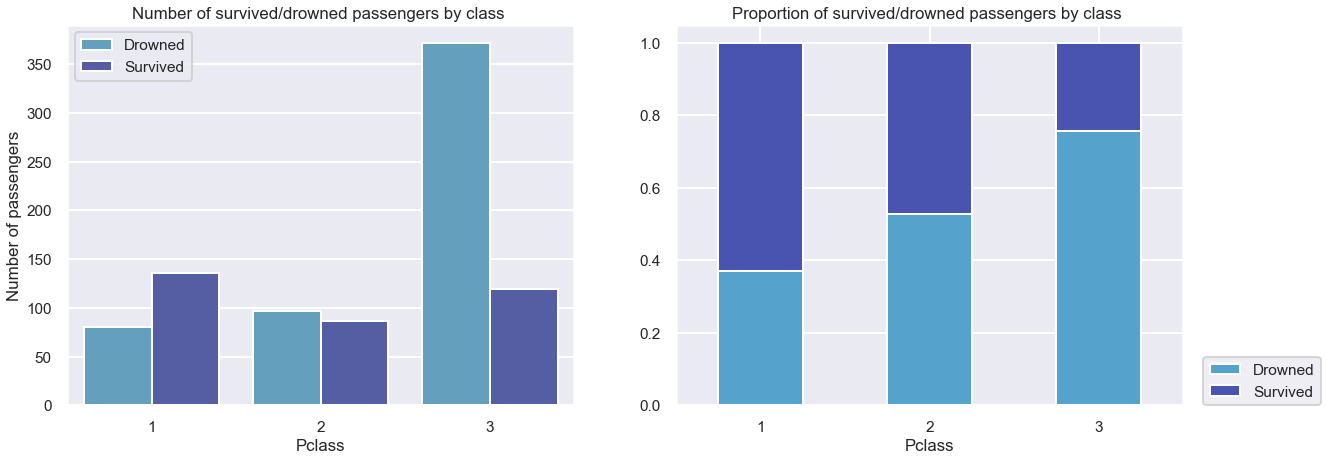

In [31]:
fig = plt.figure(figsize=(20, 7)) # setting the figure size

ax1 = fig.add_subplot(121)
# countplot
sns.countplot(x = 'Pclass', hue = 'Survived', data = train_df, palette = sns.color_palette('icefire')[:2], ax = ax1)
plt.title('Number of survived/drowned passengers by class ') # title
plt.ylabel('Number of passengers') # y label
plt.legend(( 'Drowned', 'Survived')) #setting the legend
_ = plt.xticks(rotation=False)

ax2 = fig.add_subplot(122)
d = train_df.groupby('Pclass')['Survived'].value_counts(normalize = True).unstack()
d.plot(kind='bar', stacked='True', ax = ax2, color = sns.color_palette('icefire')[:2])
plt.title('Proportion of survived/drowned passengers by class ') # title
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0)) #setting the legend
_ = plt.xticks(rotation=False)


__Observations:__

* From the plots we can see that majority of the first class passengers survived compared to the other twp classes.
* We can also say that during evacuation process passengers were given importance based on their classes.

### Gender

#### Gender Vs Class Vs Family size

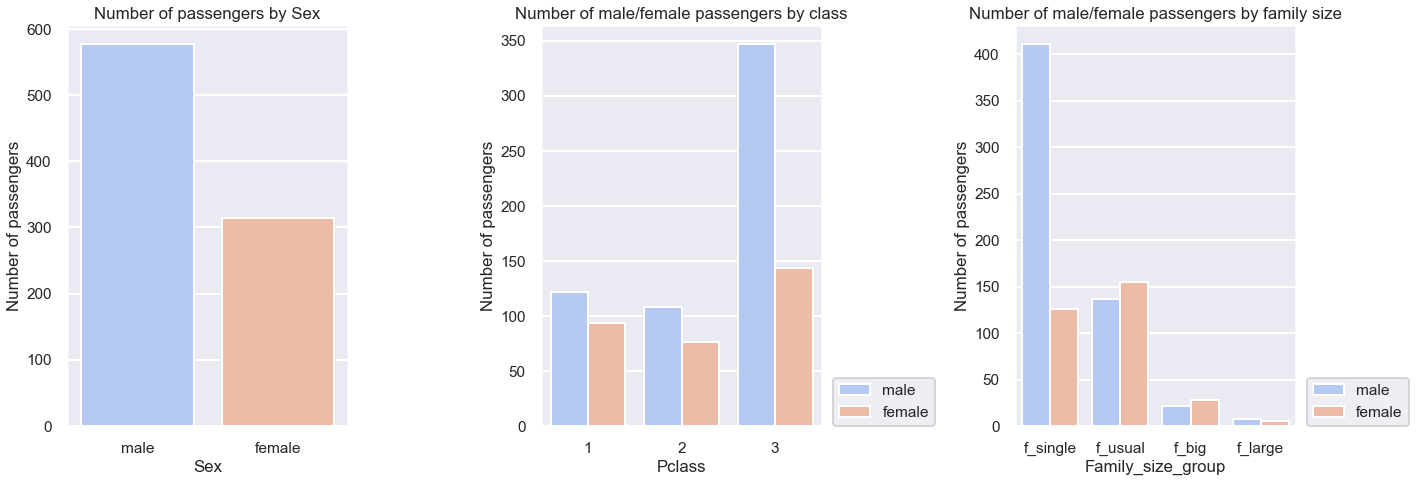

In [32]:
plt.figure(figsize = (20, 7)) # setting the figure size

plt.subplot (1,3,1)
ax = sns.countplot(train_df['Sex'], palette = 'coolwarm') # countplot
plt.title('Number of passengers by Sex') # title
plt.ylabel('Number of passengers') # y label

plt.subplot (1,3,2)
sns.countplot( x = 'Pclass', data = train_df, hue = 'Sex', palette = 'coolwarm')
plt.title('Number of male/female passengers by class') # title
plt.ylabel('Number of passengers') # y label
plt.legend( loc=(1.04,0)) # setting the legend

plt.subplot (1,3,3)
sns.countplot( x = 'Family_size_group', data = train_df, hue = 'Sex',
              palette = 'coolwarm', order=train_df['Family_size_group'].value_counts().index) # countplot
plt.title('Number of male/female passengers by family size') # title
plt.ylabel('Number of passengers') # y label
plt.legend( loc=(1.04,0)); # setting the legend

plt.tight_layout()

#### Gender Vs Survived Vs Class

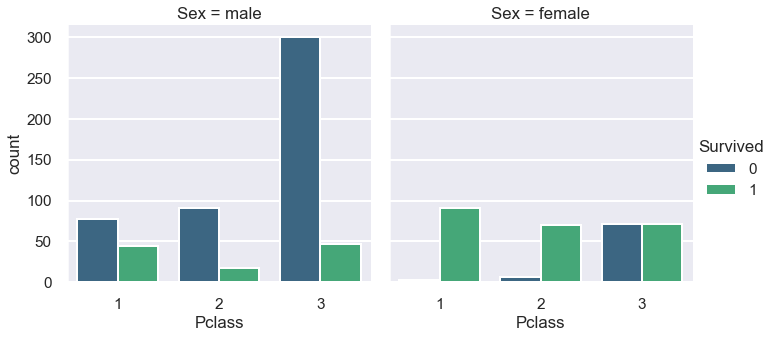

In [33]:
sns.catplot(x = 'Pclass', hue = 'Survived', col = 'Sex', data = train_df, 
            kind = 'count', palette = 'viridis') # countplot
plt.show()

__Observations:__

* We can see that in all the classes the number of female survivors are more.
* For all the classes the number of males drowned are more especially for 3rd class.

### Embarked

There are 3 values in Embarked column

* Southampton (S)
* Cherbourg (C)
* Queenstown (Q)


#### Embarked Vs Survived Vs Pclass

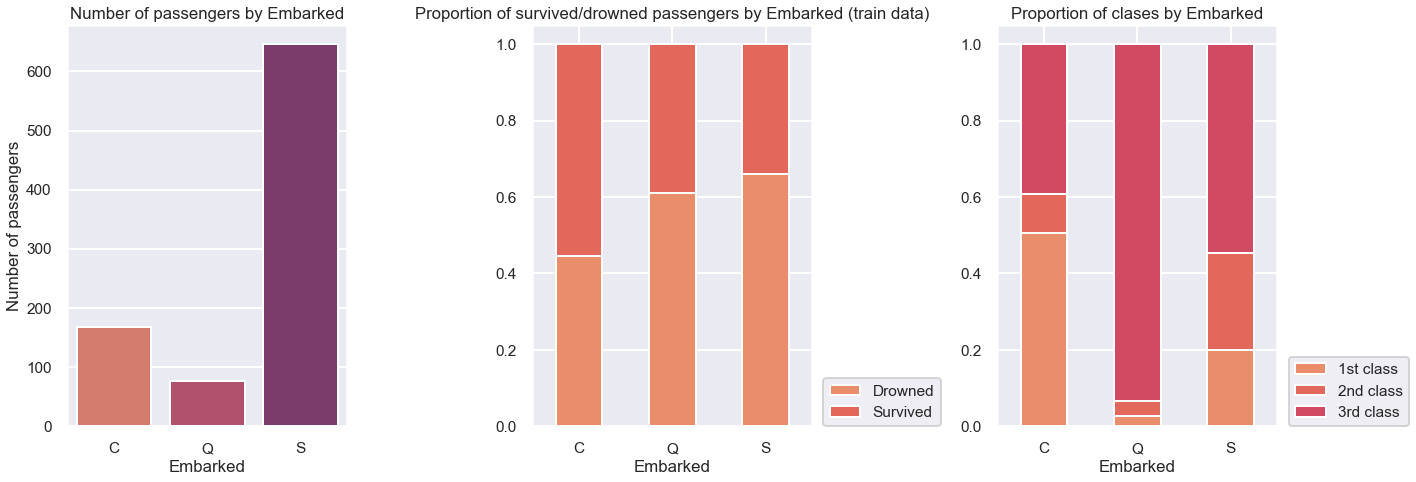

In [34]:
fig = plt.figure(figsize = (20,7)) # setting the figure size

ax1 = fig.add_subplot(131)

ax = sns.countplot(train_df['Embarked'], palette = 'flare', order = ['C', 'Q', 'S'], ax = ax1) # countplot
plt.title('Number of passengers by Embarked') # title
plt.ylabel('Number of passengers') # y label
 
ax2 = fig.add_subplot(132)
surv_by_emb = train_df.groupby('Embarked')['Survived'].value_counts(normalize = True)
surv_by_emb = surv_by_emb.unstack().sort_index()
surv_by_emb.plot(kind='bar', stacked='True', color = sns.color_palette('flare')[:2], ax = ax2) # stacked bar plot
plt.title('Proportion of survived/drowned passengers by Embarked (train data)') # title
plt.legend(( 'Drowned', 'Survived'), loc=(1.04,0)) # setting the legend
_ = plt.xticks(rotation=False)


ax3 = fig.add_subplot(133)
class_by_emb = train_df.groupby('Embarked')['Pclass'].value_counts(normalize = True)
class_by_emb = class_by_emb.unstack().sort_index()
class_by_emb.plot(kind='bar', stacked='True', color = sns.color_palette('flare')[:3], ax = ax3) # stacked bar plot
plt.legend(('1st class', '2nd class', '3rd class'), loc=(1.04,0)) # setting the legend
plt.title('Proportion of clases by Embarked') # title
_ = plt.xticks(rotation=False)

plt.tight_layout();

__Observations:__

* Here we can see that Southampton has more passengers embarked and more survival rate compared to other embarkment places.
* Queenstown has the most number of 3rd class passengers embarkment.
* Cherbourg has the most number of 1st class passengers embarkment.

### Fare

#### Fare Vs Class Vs Survived

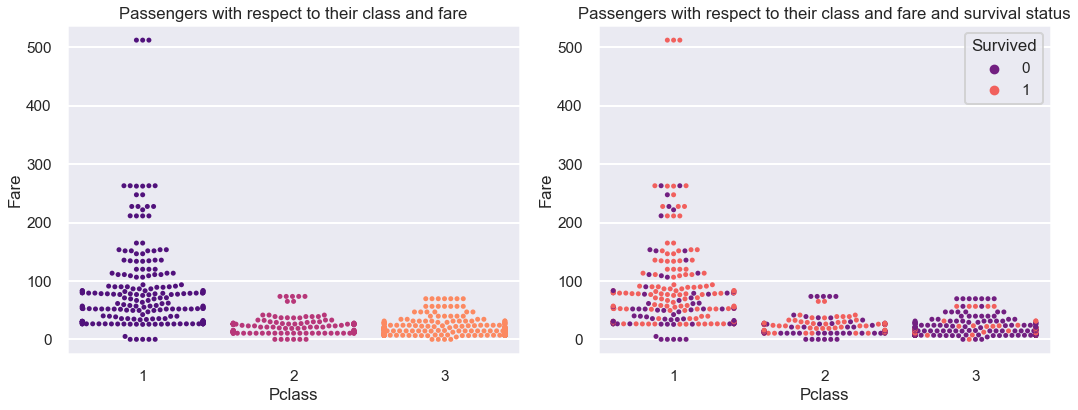

In [35]:
fig = plt.figure(figsize = (15,6)) # setting the figure size

ax1 = fig.add_subplot(121)
ax = sns.swarmplot(x = 'Pclass', y = 'Fare', data = train_df, ax = ax1, palette = 'magma') # swarmplot
plt.title('Passengers with respect to their class and fare') # title
 
ax2 = fig.add_subplot(122)
ax = sns.swarmplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = train_df, ax = ax2, palette = 'magma') # swarmplot
plt.title('Passengers with respect to their class and fare and survival status') # title

plt.tight_layout();

__Observations:__

* Here we can see that Passengers who paid a low fare had a low chance of survival compared to passengers who paid higher fare.
* There are 3 passengers who paid fair above 500 and they all survived.

## Preparing the data for Training

In [36]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size',
       'Family_size_group'],
      dtype='object')

In [37]:
# dropping the unwanted columns

train_df.drop(columns = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket','Family_size'], inplace = True)

In [38]:
X = train_df.drop('Survived', axis = 1) # independent features
y = train_df['Survived'] # dependent feature

### Feature Encoding

In [39]:
categoric_cols = X.select_dtypes(include = 'object').columns.tolist() # all the columns of type object

dummy_df = pd.get_dummies(X[categoric_cols], drop_first = 'True') # creatig dummy values for all categorical features

In [40]:
X = pd.concat([X, dummy_df], axis = 1) # concatenating the original and dummy variables dataframes

In [41]:
X.head(2)

,Pclass,Sex,Age,Fare,Cabin,Embarked,Family_size_group,Sex_male,Cabin_B,Cabin_C,...,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Embarked_Q,Embarked_S,Family_size_group_f_large,Family_size_group_f_single,Family_size_group_f_usual
0,3,male,22.0,7.2500,U,S,f_usual,1,0,0,...,0,0,0,0,1,0,1,0,0,1
1,1,female,38.0,71.2833,C,C,f_usual,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [42]:
X.drop(['Sex', 'Cabin', 'Embarked', 'Family_size_group'], axis = 1, inplace = True) # dropping the redundant features

### Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

# splitting at a test size of 30%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # object of StandardScaler

In [45]:
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns) # scaling the training data
X_val = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns) # scaling the validation data

## Model Building 

### SVM

In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
svc = SVC(random_state = 100) # object of svc

In [48]:
svc.fit(X_train, y_train) # training the model

SVC(random_state=100)

In [49]:
train_preds = svc.predict(X_train) # predicting on the train data
train_acc = round(accuracy_score(y_train, train_preds), 2) # finding the accuracy score for train targets
print('The accuracy on train data is {}%'.format(train_acc*100))

The accuracy on train data is 85.0%


In [50]:
print(confusion_matrix(train_preds, y_train)) # confusion matrix for train data

[[346  49]
 [ 46 182]]


Here we have 346 True positive predictions and 182 True negative prediction

In [51]:
print(classification_report(y_train, train_preds)) # classification report of train data

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       392
           1       0.80      0.79      0.79       231

    accuracy                           0.85       623
   macro avg       0.84      0.84      0.84       623
weighted avg       0.85      0.85      0.85       623



In [52]:
val_preds = svc.predict(X_val) # predicting on the validation data
val_acc = round(accuracy_score(y_val, val_preds), 2) # finding the accuracy score for validation targets
print('The accuracy on validation data is {}%'.format(val_acc*100))

The accuracy on validation data is 79.0%


In [53]:
print(confusion_matrix(val_preds, y_val)) # confusion matrix for validation data

[[131  29]
 [ 26  82]]


Here we have 131 True positive predictions and 82 True negative predictions.

In [54]:
print(classification_report(y_val, val_preds)) # classification report of train data

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       157
           1       0.76      0.74      0.75       111

    accuracy                           0.79       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



### Hyper parameter tuning

In [55]:
# function to find the training and validation accuracy
# using the passed parameter

def test_params(**params):
    model = SVC(random_state=42, **params) # instance of the model with the passed parameter
    model.fit(X_train, y_train) # training the model
    train_acc = accuracy_score(model.predict(X_train), y_train) # training accuracy
    val_acc = accuracy_score(model.predict(X_val), y_val) # validation accuracy
    return train_acc, val_acc

In [56]:
# function to plot the training and validation accuracy
# for the passed parameter

def test_param_and_plot(param_name, param_values):
    train_acc_all, val_acc_all = [], [] # list of train and validation accuracy
    for value in param_values: # for all the passed values to a parameter
        params = {param_name: value} # changing the parameters as a dictionary
        train_acc, val_acc = test_params(**params) # finding the train and validation accuracy
        train_acc_all.append(train_acc) # appending the train accuracy
        val_acc_all.append(val_acc) # appending the validation accuracy
    # plotting
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name) # title
    plt.plot(param_values, train_acc_all, 'b-o') # line graph for train data
    plt.plot(param_values, val_acc_all, 'r-o') # line graph for validation data
    plt.xlabel(param_name) # x label
    plt.ylabel('Accuracy') # y label
    plt.legend(['Training', 'Validation']) # legend

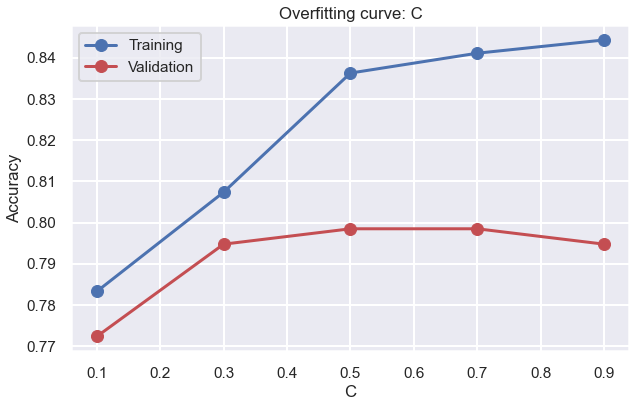

In [57]:
test_param_and_plot('C', [0.1, 0.3, 0.5, 0.7, 0.9]) # Passing c with set of values

We can see that for a value of 0.3 the training and validation accuracy is good and any value greater seems to overfit the data.

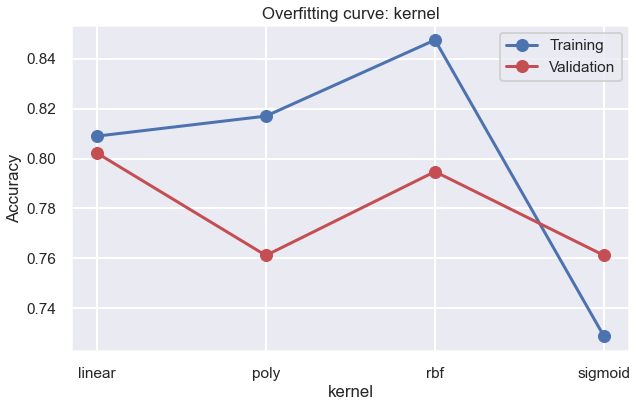

In [58]:
test_param_and_plot('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])

We can see that for linear kernel there is good accuracy on both training and validation data

In [59]:
# building the model with the above derived parameters

model = SVC(kernel = 'linear', C = 0.3, probability = True)

In [60]:
model.fit(X_train, y_train)

SVC(C=0.3, kernel='linear', probability=True)

In [61]:
train_preds = model.predict(X_train) # predicting on the train data
train_acc = round(accuracy_score(y_train, train_preds), 2) # finding the accuracy score for train targets
print('The accuracy on train data is {}%'.format(train_acc*100))

The accuracy on train data is 81.0%


In [62]:
print(confusion_matrix(train_preds, y_train)) # confusion matrix for train data

[[348  75]
 [ 44 156]]


Here we have 348 True positive predictions and 156 True negative predictions.

In [63]:
print(classification_report(y_train, train_preds)) # classification report of train data

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       392
           1       0.78      0.68      0.72       231

    accuracy                           0.81       623
   macro avg       0.80      0.78      0.79       623
weighted avg       0.81      0.81      0.81       623



In [64]:
val_preds = model.predict(X_val) # predicting on the validation data
val_acc = round(accuracy_score(y_val, val_preds), 2) # finding the accuracy score for validation targets
print('The accuracy on validation data is {}%'.format(val_acc*100))

The accuracy on validation data is 80.0%


In [65]:
print(confusion_matrix(val_preds, y_val)) # confusion matrix for validation data

[[139  35]
 [ 18  76]]


Here we have 139 True positive predictions and 76 True negative predictions.

In [66]:
print(classification_report(y_val, val_preds)) # classification report of train data

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       157
           1       0.81      0.68      0.74       111

    accuracy                           0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



## Prediction on unseen data ( Test data )

In [67]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Family_size_group
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,U,Q,1.0,f_single
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,U,S,2.0,f_usual
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,U,Q,1.0,f_single
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,U,S,1.0,f_single
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,U,S,2.0,f_usual


In [68]:
test_df_id = test_df.iloc[:,0] # storing the id column as a series

In [69]:
# dropping the unwanted columns

test_df.drop(['PassengerId', 'Name','SibSp' , 'Parch' , 'Ticket'], axis = 1, inplace = True)

In [70]:
# filling the nan value in Fare with its median

test_df['Fare'].fillna(test_df['Fare'].median(), inplace = True)

### Feature Encoding

In [71]:
categoric_cols = test_df.select_dtypes(include = 'object').columns # getting the column names of type object
test_dummy_df = pd.get_dummies(test_df[categoric_cols], drop_first = True) # creating dummy variables for the categoric columns
test_dummy_df.head(2)

,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_Q,Embarked_S,Family_size_group_f_large,Family_size_group_f_single,Family_size_group_f_usual
0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,0,0,0,0,0,0,0,1,0,1,0,0,1


In [72]:
test_df = pd.concat([test_df, test_dummy_df], axis = 1) # concatenating the dummy data and original data

# dropping the redundant features
test_df.drop(['Sex', 'Cabin', 'Embarked', 'Family_size_group'], axis = 1, inplace = True)
test_df.head(2)

,Pclass,Age,Fare,Family_size,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_Q,Embarked_S,Family_size_group_f_large,Family_size_group_f_single,Family_size_group_f_usual
0,3,34.5,7.8292,1.0,1,0,0,0,0,0,0,1,1,0,0,1,0
1,3,47.0,7.0000,2.0,0,0,0,0,0,0,0,1,0,1,0,0,1


### Feature Scaling

In [73]:
test_df = pd.DataFrame(scaler.fit_transform(test_df), columns = test_df.columns)

In [74]:
test_df.head(2)

,Pclass,Age,Fare,Family_size,Sex_male,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_U,Embarked_Q,Embarked_S,Family_size_group_f_large,Family_size_group_f_single,Family_size_group_f_usual
0,0.873482,0.389213,-0.497413,-0.651797,0.755929,-0.212132,-0.302298,-0.179161,-0.14834,-0.139686,-0.04897,0.52753,2.843757,-1.350676,-0.085023,0.981041,-0.921714
1,0.873482,1.362944,-0.512278,0.137916,-1.322876,-0.212132,-0.302298,-0.179161,-0.14834,-0.139686,-0.04897,0.52753,-0.351647,0.740370,-0.085023,-1.019325,1.084935


In [75]:
test_preds = model.predict(test_df)
test_preds

array([1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,

In [76]:
prediction_df = pd.DataFrame(test_preds, test_df_id,  columns = ['Survived']) # dataframe of prediction on test data
prediction_df.head()

,Survived
PassengerId,
892,1
893,0
894,1
895,1
896,0
